In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

import numpy as np
import pandas as pd

# !pip install econtools
import econtools

import matplotlib.pyplot as plt
import seaborn as sns 
import plot_aes as paes

%matplotlib inline
sns.set()
# sns.set_style('white')
sns.set_style('white')
sns.set_palette("Set2")

In [2]:
path = 'C:/Users/kli/OneDrive - Credit Union National Association, Inc/Branch Location/'
subpath = 'data_clean/branch access/'
savepath = 'outputs/graphs/branch_access/'

Year = ['2006','2011','2016','2018']
# Distance = ['2mile','5mile','10mile']
Income = ['Income: 1st quartile','Income: 2nd quartile','Income: 3rd quartile','Income: 4th quartile']
Urb = ['rural','suburban','urban']

# Tract

In [3]:
DF = {}

Key = ['2mile','5mile','10mile']

for key in Key:
    DF[key] = (econtools.read(path + subpath + 'branch_access_' + key + '.dta')
              .query('medincome==medincome'))  # there are missing medincome
               
for key, item in DF.items():
    print(item.shape, item.gisjoin.nunique())
# print(df.shape, df.gisjoin.nunique())

(288576, 58) 72144
(288576, 58) 72144
(288576, 58) 72144


# Banking desert

## Urban (2 miles)

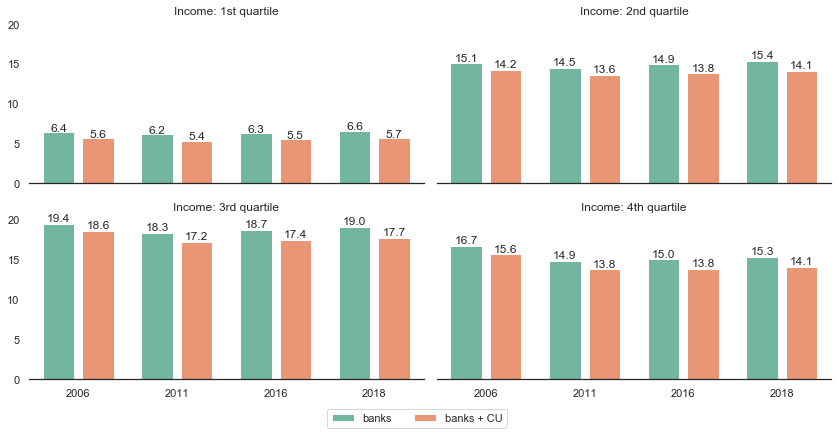

In [6]:
df = (DF['2mile']
      .query('urbanization_tri=="urban"')
      .filter(['gisjoin','year','medincome_quartile', 
               'desert_cu','desert_bank','desert','desert_large','desert_com'])
      .rename(columns = {'desert_cu':'credit unions', 'desert_bank':'banks', 'desert':'financial institutions',
               'desert_large':'large banks', 'desert_com':'community banks'}))

df = df.melt(id_vars=['gisjoin', 'year','medincome_quartile'], 
             value_vars=['credit unions', 'banks','financial institutions','large banks','community banks'],
             var_name='InstType',
             value_name='desert')

df_plot =  (df
            .groupby(['year','InstType','medincome_quartile'], as_index=False)
            .agg({'desert':'mean'})
#             .query('InstType == "banks" | InstType=="financial institutions"'))
            .query('InstType == "banks" | InstType=="financial institutions"'))
            # Here I don't include large, credit unions and community banks

df_plot.loc[df_plot['InstType']=="financial institutions", 'InstType'] = "banks + CU"
df_plot.loc[:, 'desert'] = df_plot['desert'] * 100

g = sns.catplot('year','desert',
                col = 'medincome_quartile',col_order = Income, col_wrap=2,                    
                hue='InstType',
#                 hue_order = ['banks', 'banks + CU'],
                kind='bar', height=3, aspect=2, legend=False, data=df_plot)

g = paes.catplot_bar_col(g, 0.8,1, "","")   
g.despine(left=True)
plt.legend(loc='lower center', bbox_to_anchor = (-0.05, -0.3),ncol=3, borderaxespad=0) 

# g.fig.suptitle('Branch deserts in urban areas (2 mile buffer)', x=0.5, y=1.02)
g.savefig(path + savepath + 'desert_urban.png')

## Suburban (5-mile)

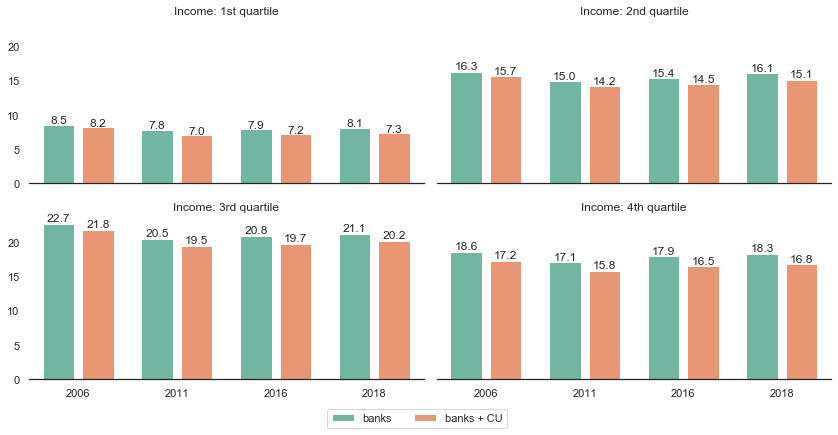

In [7]:
df = (DF['5mile']
      .query('urbanization_tri=="suburban"')
      .filter(['gisjoin','year','medincome_quartile', 
               'desert_cu','desert_bank','desert','desert_large','desert_com'])
      .rename(columns = {'desert_cu':'credit unions', 'desert_bank':'banks', 'desert':'financial institutions',
               'desert_large':'large banks', 'desert_com':'community banks'}))

df = df.melt(id_vars=['gisjoin', 'year','medincome_quartile'], 
             value_vars=['credit unions', 'banks','financial institutions','large banks','community banks'],
             var_name='InstType',
             value_name='desert')

df_plot =  (df
            .groupby(['year','InstType','medincome_quartile'], as_index=False)
            .agg({'desert':'mean'})
#             .query('InstType == "banks" | InstType=="financial institutions"'))
            .query('InstType == "banks" | InstType=="financial institutions"'))
            # Here I don't include large, credit unions and community banks

df_plot.loc[df_plot['InstType']=="financial institutions", 'InstType'] = "banks + CU"
df_plot.loc[:, 'desert'] = df_plot['desert'] * 100

g = sns.catplot('year','desert',
                col = 'medincome_quartile',col_order = Income, col_wrap=2,                    
                hue='InstType',
#                 hue_order = ['banks', 'banks + CU'],
                kind='bar', height=3, aspect=2, legend=False, data=df_plot)

g = paes.catplot_bar_col(g, 0.8,1, "","")   
g.despine(left=True)
plt.legend(loc='lower center', bbox_to_anchor = (-0.05, -0.3),ncol=3, borderaxespad=0) 
# g.fig.suptitle('Branch deserts in suburban areas (5 mile buffer)', x=0.5, y=1.02)
g.savefig(path + savepath + 'desert_suburban.png')

## Rural (10-mile)

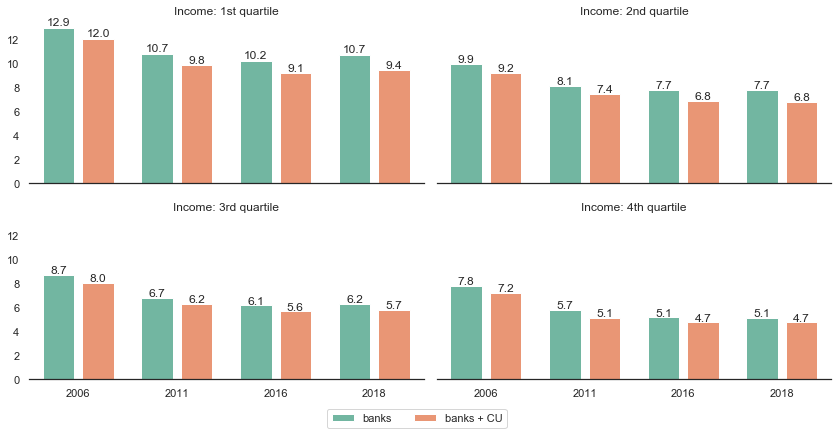

In [8]:
df = (DF['10mile']
      .query('urbanization_tri=="rural"')
      .filter(['gisjoin','year','medincome_quartile', 
               'desert_cu','desert_bank','desert','desert_large','desert_com'])
      .rename(columns = {'desert_cu':'credit unions', 'desert_bank':'banks', 'desert':'financial institutions',
               'desert_large':'large banks', 'desert_com':'community banks'}))

df = df.melt(id_vars=['gisjoin', 'year','medincome_quartile'], 
             value_vars=['credit unions', 'banks','financial institutions','large banks','community banks'],
             var_name='InstType',
             value_name='desert')

df_plot =  (df
            .groupby(['year','InstType','medincome_quartile'], as_index=False)
            .agg({'desert':'mean'})
#             .query('InstType == "banks" | InstType=="financial institutions"'))
            .query('InstType == "banks" | InstType=="financial institutions"'))
            # Here I don't include large, credit unions and community banks

df_plot.loc[df_plot['InstType']=="financial institutions", 'InstType'] = "banks + CU"
df_plot.loc[:, 'desert'] = df_plot['desert'] * 100

g = sns.catplot('year','desert',
                col = 'medincome_quartile',col_order = Income, col_wrap=2,                    
                hue='InstType',
#                 hue_order = ['banks', 'banks + CU'],
                kind='bar', height=3, aspect=2, legend=False, data=df_plot)

g = paes.catplot_bar_col(g, 0.8,1, "","")   
g.despine(left=True)
plt.legend(loc='lower center', bbox_to_anchor = (-0.05, -0.3),ncol=3, borderaxespad=0) 
# g.fig.suptitle('Branch deserts in rural areas (10 mile buffer)', x=0.5, y=1.02)
g.savefig(path + savepath + 'desert_rural.png')

# Branch access

## urban (2 miles)

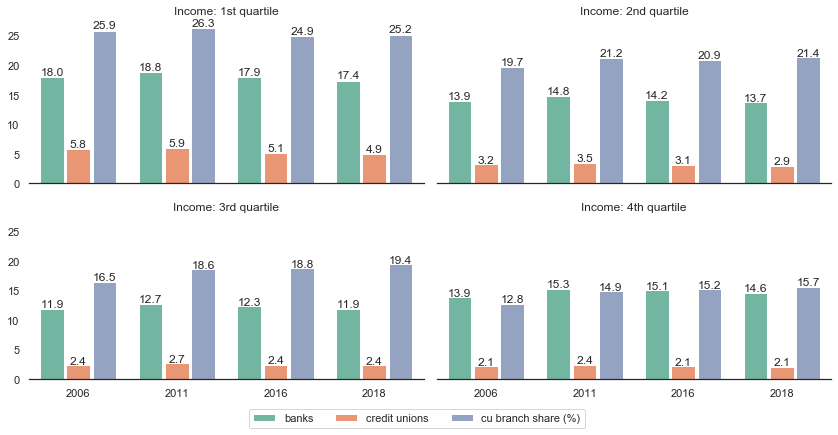

In [9]:
df = (DF['2mile']
      .query('urbanization_tri=="urban"')
      .filter(['gisjoin','year','medincome_quartile', 
               'dist_inv_cu','dist_inv_bank','dist_inv_large','dist_inv_com', 'dist_inv','share_cu_inv'])
      .rename(columns = {'dist_inv_cu':'credit unions', 'dist_inv_bank':'banks',
                         'dist_inv_large':'large banks', 'dist_inv_com':'community banks',
                         'dist_inv':'financial institutions',
                         'share_cu_inv': 'cu branch share (%)'}))

df = df.melt(id_vars=['gisjoin', 'year','medincome_quartile'], 
             value_vars=['credit unions', 'banks','financial institutions','large banks','community banks', 'cu branch share (%)'],
             var_name='InstType',
             value_name='wcounts')

df_plot =  (df
            .groupby(['year','InstType','medincome_quartile'], as_index=False)
            .agg({'wcounts':'mean'})
#             .query('InstType == "banks" | InstType=="financial institutions"'))
            .query('InstType == "banks" | InstType=="credit unions" | InstType=="cu branch share (%)"'))
            # Here I don't include large, credit unions and community banks
 
df_plot.loc[df_plot['InstType']=="cu branch share (%)", 'wcounts'] = df_plot['wcounts'] * 100

g = sns.catplot('year','wcounts',
                col = 'medincome_quartile',col_order = Income, col_wrap=2,                    
                hue='InstType',
#                 hue_order = ['banks', 'banks + CU'],
                kind='bar', height=3, aspect=2, legend=False, data=df_plot)

g = paes.catplot_bar_col(g, 0.9,1, "","")   
g.despine(left=True)
plt.legend(loc='lower center', bbox_to_anchor = (-0.05, -0.3),ncol=3, borderaxespad=0) 
# g.fig.suptitle('Weighted branch counts of urban tracts (2 mile buffer)', x=0.5, y=1.02)
g.savefig(path + savepath + 'wcounts_urban.png')

## suburban (5 miles)

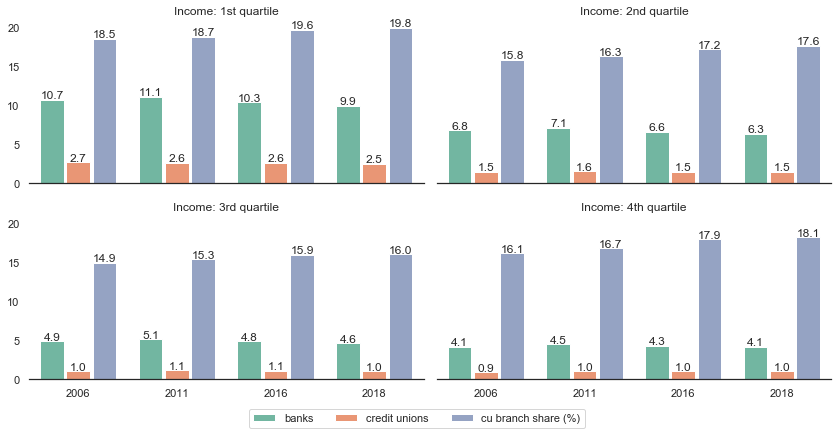

In [10]:
df = (DF['5mile']
      .query('urbanization_tri=="suburban"')
      .filter(['gisjoin','year','medincome_quartile', 
               'dist_inv_cu','dist_inv_bank','dist_inv_large','dist_inv_com', 'dist_inv','share_cu_inv'])
      .rename(columns = {'dist_inv_cu':'credit unions', 'dist_inv_bank':'banks',
                         'dist_inv_large':'large banks', 'dist_inv_com':'community banks',
                         'dist_inv':'financial institutions',
                         'share_cu_inv': 'cu branch share (%)'}))

df = df.melt(id_vars=['gisjoin', 'year','medincome_quartile'], 
             value_vars=['credit unions', 'banks','financial institutions','large banks','community banks', 'cu branch share (%)'],
             var_name='InstType',
             value_name='wcounts')

df_plot =  (df
            .groupby(['year','InstType','medincome_quartile'], as_index=False)
            .agg({'wcounts':'mean'})
#             .query('InstType == "banks" | InstType=="financial institutions"'))
            .query('InstType == "banks" | InstType=="credit unions" | InstType=="cu branch share (%)"'))
            # Here I don't include large, credit unions and community banks
 
df_plot.loc[df_plot['InstType']=="financial institutions", 'InstType'] = "banks + CU"
df_plot.loc[df_plot['InstType']=="cu branch share (%)", 'wcounts'] = df_plot['wcounts'] * 100

g = sns.catplot('year','wcounts',
                col = 'medincome_quartile',col_order = Income, col_wrap=2,                    
                hue='InstType',
#                 hue_order = ['banks', 'banks + CU'],
                kind='bar', height=3, aspect=2, legend=False, data=df_plot)

g = paes.catplot_bar_col(g, 0.9,1, "","")   
g.despine(left=True)
plt.legend(loc='lower center', bbox_to_anchor = (-0.05, -0.3),ncol=3, borderaxespad=0) 
# g.fig.suptitle('Weighted branch counts of suburban tracts (5 mile buffer)', x=0.5, y=1.02)
g.savefig(path + savepath + 'wcounts_suburban.png')

## rural (10 miles)

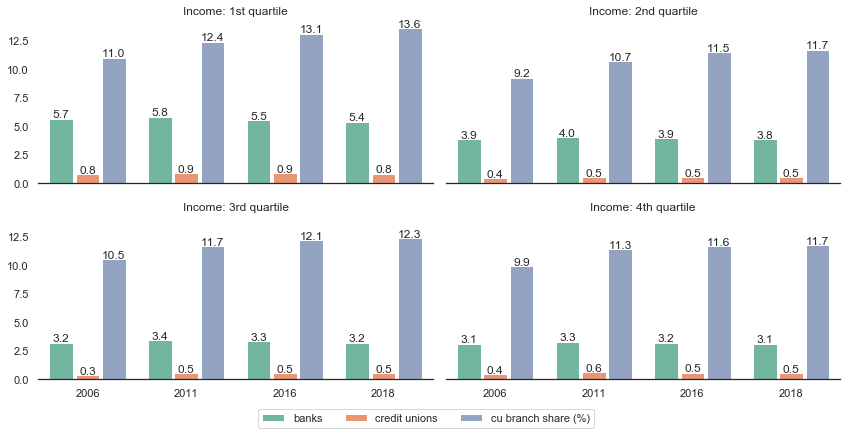

In [11]:
df = (DF['10mile']
      .query('urbanization_tri=="rural"')
      .filter(['gisjoin','year','medincome_quartile', 
               'dist_inv_cu','dist_inv_bank','dist_inv_large','dist_inv_com', 'dist_inv','share_cu_inv'])
      .rename(columns = {'dist_inv_cu':'credit unions', 'dist_inv_bank':'banks',
                         'dist_inv_large':'large banks', 'dist_inv_com':'community banks',
                         'dist_inv':'financial institutions',
                         'share_cu_inv': 'cu branch share (%)'}))

df = df.melt(id_vars=['gisjoin', 'year','medincome_quartile'], 
             value_vars=['credit unions', 'banks','financial institutions','large banks','community banks', 'cu branch share (%)'],
             var_name='InstType',
             value_name='wcounts')

df_plot =  (df
            .groupby(['year','InstType','medincome_quartile'], as_index=False)
            .agg({'wcounts':'mean'})
#             .query('InstType == "banks" | InstType=="financial institutions"'))
            .query('InstType == "banks" | InstType=="credit unions" | InstType=="cu branch share (%)"'))
            # Here I don't include large, credit unions and community banks
 
df_plot.loc[df_plot['InstType']=="financial institutions", 'InstType'] = "banks + CU"
df_plot.loc[df_plot['InstType']=="cu branch share (%)", 'wcounts'] = df_plot['wcounts'] * 100

g = sns.catplot('year','wcounts',
                col = 'medincome_quartile',col_order = Income, col_wrap=2,                    
                hue='InstType',
#                 hue_order = ['banks', 'banks + CU'],
                kind='bar', height=3, aspect=2, legend=False, data=df_plot)

g = paes.catplot_bar_col(g, 0.9,1, "","")   
g.despine(left=True)
plt.legend(loc='lower center', bbox_to_anchor = (-0.05, -0.3),ncol=3, borderaxespad=0) 
# g.fig.suptitle('Weighted branch counts of rural tracts (10 mile buffer)', x=0.5, y=1.02)
g.savefig(path + savepath + 'wcounts_rural.png')

# distance to closest branch (within 10 miles)

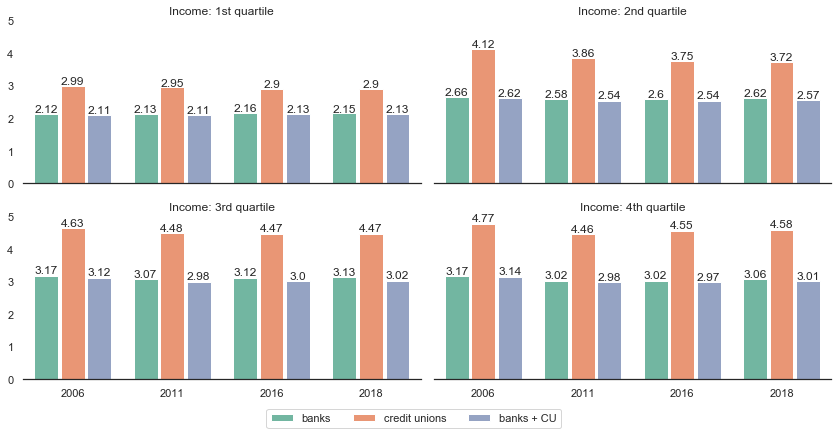

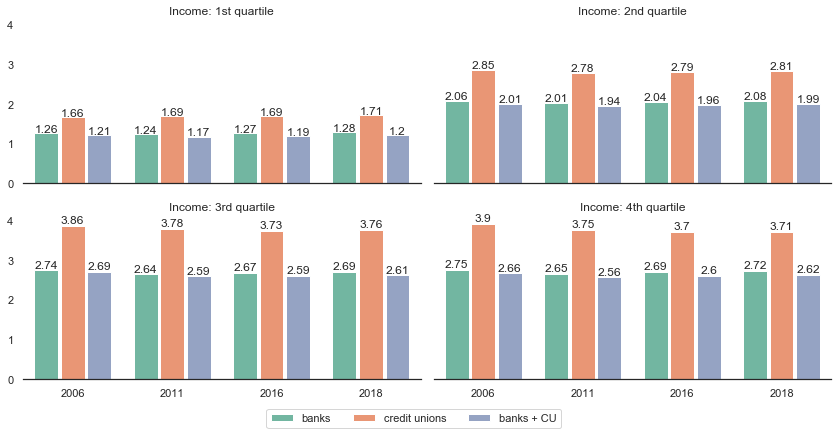

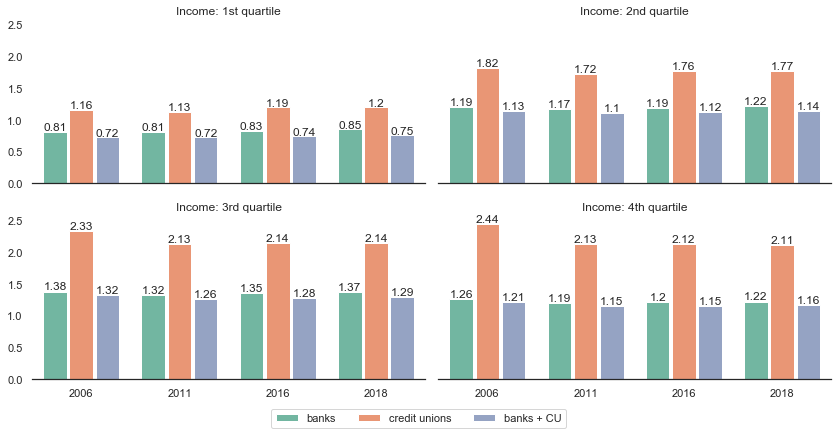

In [12]:
for urb in Urb:
    df = (DF['10mile'][DF['10mile']['urbanization_tri']==urb]
          .filter(['gisjoin','year','medincome_quartile', 
                   'dist_closest_cu','dist_closest_bank','dist_closest_large','dist_closest_com', 'dist_closest'])
          .rename(columns = {'dist_closest_cu':'credit unions', 'dist_closest_bank':'banks',
                             'dist_closest_large':'large banks', 'dist_closest_com':'community banks',
                             'dist_closest':'financial institutions'}))

    df = df.melt(id_vars=['gisjoin', 'year','medincome_quartile'], 
                 value_vars=['credit unions', 'banks','financial institutions','large banks','community banks'],
                 var_name='InstType',
                 value_name='dist_closest')

    df_plot =  (df
                .groupby(['year','InstType','medincome_quartile'], as_index=False)
                .agg({'dist_closest':'mean'})
    #             .query('InstType == "banks" | InstType=="financial institutions"'))
                .query('InstType == "banks" | InstType=="credit unions" | InstType=="financial institutions"'))
                # Here I don't include large, credit unions and community banks

    df_plot.loc[df_plot['InstType']=="financial institutions", 'InstType'] = "banks + CU"

    g = sns.catplot('year','dist_closest',
                    col = 'medincome_quartile',col_order = Income, col_wrap=2,                    
                    hue='InstType',
    #                 hue_order = ['banks', 'banks + CU'],
                    kind='bar', height=3, aspect=2, legend=False, data=df_plot)

    g = paes.catplot_bar_col(g, 0.9,2, "","")   
    g.despine(left=True)
    plt.legend(loc='lower center', bbox_to_anchor = (-0.05, -0.3),ncol=3, borderaxespad=0) 
#     g.fig.suptitle('Distance to the closest branch in ' + urb + ' areas (within 10 miles)', x=0.5, y=1.02)
    g.savefig(path + savepath + 'dist_closest_' + urb + '.png')